In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import pickle

In [2]:
pd.read_excel("data/analis_data.xlsx")

,Comuna,m2_Construidos,m2_totales,Habitaciones,Banos,segunda_planta,Estacionamientos,Publi,Precio,UF,...,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Talagante,Vitacura,Ñuñoa
0,Macul,94,340,4,2,0,0,03/12/2022,266395950,7650,...,0,0,0,0,0,0,0,0,0,0
1,Macul,128,128,2,1,0,1,22/11/2022,110000000,3158,...,0,0,0,0,0,0,0,0,0,0
2,Macul,144,221,4,2,0,3,21/11/2022,262913650,7550,...,0,0,0,0,0,0,0,0,0,0
3,Macul,81,160,3,1,0,3,10/11/2022,125000000,3589,...,0,0,0,0,0,0,0,0,0,0
4,Macul,321,249,7,7,1,2,03/12/2022,350911371,10077,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,Pirque,107,160,5,2,0,1,18/11/2022,123000000,3532,...,0,0,0,0,0,0,0,0,0,0
5294,Pirque,341,5000,3,2,0,0,18/11/2022,574579500,16500,...,0,0,0,0,0,0,0,0,0,0
5295,Pirque,90,140,5,2,0,2,07/11/2022,99000000,2842,...,0,0,0,0,0,0,0,0,0,0
5296,Pirque,75,130,3,1,0,1,07/11/2022,115000000,3302,...,0,0,0,0,0,0,0,0,0,0


In [3]:
casas=pd.read_excel("data/analis_data.xlsx")

# IMPLEMENTACION DE MODELOS DE REGRESION

## Definicion de variables 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

X= casas.drop(['Comuna','Publi','Precio', 'UF', "UF_log",'Número de establecimientos eduacion basica','Víctimas Robo con violencia o Intimidación'], axis=1)
y= casas["UF_log"]


seed= 12

#X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)



In [5]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)


Total features shape: (5298, 79)
Train features shape: (3973, 79)
Train target shape: (3973,)
Test features shape: (1325, 79)
Test target shape: (1325,)


### 1. Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
print("Score train :", metrics.r2_score(y_train, lr.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, lr.predict(X_test)))
acc1 = metrics.r2_score(y_test, lr.predict(X_test))

Score train : 0.7560396527529026
Score test: 0.7784955314823367


### 2. Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_feats = PolynomialFeatures(degree = 3) 
poly_feats.fit(X_train)
X_poly_train = poly_feats.transform(X_train)
X_poly_test = poly_feats.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
print("Score train :", metrics.r2_score(y_train, poly_reg.predict(X_poly_train)))
print("Score test:", metrics.r2_score(y_test, poly_reg.predict(X_poly_test)))
acc2 = metrics.r2_score(y_test, poly_reg.predict(X_poly_test))

### 2. Decision Trees

In [8]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, dt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, dt.predict(X_test)))
acc3 = metrics.r2_score(y_test, dt.predict(X_test))

Score train : 0.8221046852891827
Score test: 0.8216953033336548


### 4. KNN

In [9]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, knn.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, knn.predict(X_test)))
acc4 = metrics.r2_score(y_test, knn.predict(X_test))

Score train : 0.8543181605206108
Score test: 0.8410002730308576


Score train : 0.8345632574592086
Score test: 0.8342944284814509

### 5. XGB

In [10]:
#!pip install xgboost

In [55]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=20, random_state=seed)
xgb_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, xgb_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, xgb_reg.predict(X_test)))
acc5 = metrics.r2_score(y_test, xgb_reg.predict(X_test))

Score train : 0.9320447731471193
Score test: 0.8989989678251461


In [12]:
X_train.columns

Index(['m2_Construidos', 'm2_totales', 'Habitaciones', 'Banos',
       'segunda_planta', 'Estacionamientos', 'Poblacion total 2020',
       'Superficie de Área Verde m²', 'Superficie Plazas m²',
       'Número de establecimientos educacion inicial',
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
       'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)',
       'Superficie total de campamentos (ha)',
       ' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suministro electrico',
       'porcentaje manzanas con veredas con buena calidad de pavimento',
       'Total de residuos (t)',
       ' Porcentaje de residuos municipales valorizados',
       ' Porcentaje de viviendas en mal estado  y/o carente  servici

In [13]:
xgb_reg.feature_importances_

array([3.6602724e-02, 7.5399995e-02, 1.7593529e-03, 3.4061491e-02,
       1.9569336e-03, 1.5615158e-03, 2.3674238e-03, 2.3883611e-03,
       2.2275553e-03, 8.9895641e-03, 4.9036061e-03, 8.0880718e-03,
       7.4608095e-02, 1.9913272e-03, 2.8435264e-03, 5.3366902e-03,
       1.9747124e-03, 2.5617601e-03, 8.6361729e-02, 1.0324569e-01,
       2.9526935e-03, 3.8170158e-03, 2.7059647e-03, 2.1116920e-02,
       3.8957700e-02, 5.7453504e-03, 2.6390695e-03, 2.4105143e-03,
       8.3123827e-03, 6.2967623e-03, 4.1634965e-01, 3.8319880e-03,
       3.8696469e-03, 3.3926365e-03, 3.7922354e-03, 0.0000000e+00,
       2.1889452e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.8733153e-03, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.6510048e-04, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.9559190e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [14]:
df_impor=pd.DataFrame({"col":X_train.columns, "coef_impor":xgb_reg.feature_importances_})

In [15]:
#pd.set_option("display.max_rows", None)# esto es para ver todas las columnas

In [16]:
#pd.reset_option('all')# esto es para recetear que se vean todas la lineas

In [17]:
df_impor.sort_values(by= "coef_impor", ascending= False).head(20)

,col,coef_impor
30,Porcentaje de viviendas con situación de alleg...,0.416350
19,Fallos suministro electrico,0.103246
18,Consumo Per Capita residencial (Kwh/persona),0.086362
1,m2_totales,0.075400
12,Número de establecimientos privados,0.074608
24,Porcentaje de participación del FCM en el Ingr...,0.038958
0,m2_Construidos,0.036603
3,Banos,0.034061
23,Porcentaje de viviendas en mal estado y/o ca...,0.021117
9,Número de establecimientos educacion inicial,0.008990


In [18]:
xgb_reg.score(X_test, y_test)

0.8989989678251461

In [19]:
xgb_reg.score(X_train, y_train)

0.9320447731471193

### 6. AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=15, random_state=seed)
ada_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, ada_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, ada_reg.predict(X_test)))
acc6 = metrics.r2_score(y_test, ada_reg.predict(X_test))

Score train : 0.8123505605171433
Score test: 0.8093741962646933


### 7. Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=60, max_depth=3,  max_features=3, random_state=seed) 
rnd_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, rnd_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, rnd_reg.predict(X_test)))
acc7 = metrics.r2_score(y_test, rnd_reg.predict(X_test))

Score train : 0.6502652613204243
Score test: 0.66369913031116


### 8. GradientBoosting

In [65]:
from sklearn.ensemble import GradientBoostingRegressor #110

gbrt = GradientBoostingRegressor(n_estimators=300, random_state=seed,max_depth=3)
gbrt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, gbrt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, gbrt.predict(X_test)))
acc8 = metrics.r2_score(y_test, gbrt.predict(X_test))




Score train : 0.9299736934731327
Score test: 0.9022904687880714


### 9. SVM

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear", C=50)
svm_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, svm_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, svm_reg.predict(X_test)))
acc9 = metrics.r2_score(y_test, svm_reg.predict(X_test))

### ENSEMBLE

In [66]:
result = [acc1, acc3, acc4, acc5, acc6, acc7, acc8, ]
models = ['LinReg', "DecTree", "KNN", "XGBoost", "AdaBoost", "RandomForest", "GradBoosting"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

GradBoosting    0.902290
XGBoost         0.898999
KNN             0.841000
DecTree         0.821695
AdaBoost        0.809374
LinReg          0.778496
RandomForest    0.663699
dtype: float64

## VotingRegressor

In [24]:
from sklearn.ensemble import VotingRegressor

estimators = [('LinReg', lr), ("DecTree",dt), ("KNN", knn), ("XGBoost",xgb_reg), ("AdaBoost", ada_reg), ("RandomForest", rnd_reg), ("GradBoosting", gbrt)]

voting_reg = VotingRegressor(estimators=estimators, verbose=True)

voting_reg.fit(X_train, y_train)
print(voting_reg.__class__.__name__, voting_reg.score(X_test,y_test))

[Voting] ................... (1 of 7) Processing LinReg, total=   0.0s
[Voting] .................. (2 of 7) Processing DecTree, total=   0.0s
[Voting] ...................... (3 of 7) Processing KNN, total=   0.0s
[Voting] .................. (4 of 7) Processing XGBoost, total=   0.1s
[Voting] ................. (5 of 7) Processing AdaBoost, total=   0.2s
[Voting] ............. (6 of 7) Processing RandomForest, total=   0.1s
[Voting] ............. (7 of 7) Processing GradBoosting, total=   1.0s
VotingRegressor 0.8769397049172715


## StackingRegressor 

In [25]:
#!pip install mlxtend

In [26]:
from mlxtend.regressor import StackingRegressor

In [27]:
lr = LinearRegression()
dt= DecisionTreeRegressor(max_depth=4)
knn = KNeighborsRegressor(n_neighbors=15)
xgb_reg = XGBRegressor(n_estimators=20, random_state=seed)
ada_reg = AdaBoostRegressor(n_estimators=15, random_state=seed)
rnd_reg = RandomForestRegressor(n_estimators=60, max_depth=3,  max_features=3, random_state=seed) 
gbrt = GradientBoostingRegressor(n_estimators=60, random_state=seed,max_depth=3)

In [28]:
stregr = StackingRegressor(regressors=[dt, gbrt, xgb_reg, ada_reg, rnd_reg, lr], 
                           meta_regressor= knn)

stregr.fit(X_train, y_train)


StackingRegressor(meta_regressor=KNeighborsRegressor(n_neighbors=15),
                  regressors=[DecisionTreeRegressor(max_depth=4),
                              GradientBoostingRegressor(n_estimators=60,
                                                        random_state=12),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=20, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=12, ...),
                              AdaBoostRegressor(n_estimators=15,
                                                random_state=12),
                              RandomForestRegressor(max_depth=3, max_features=3,
                                                    n_estimators=60,
                                                    random_state=12),
                              LinearRegression()])

In [29]:
stregr.score(X_test,y_test)

c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.8985999979114947

In [30]:
lr = LinearRegression()
dt= DecisionTreeRegressor(max_depth=4)
knn = KNeighborsRegressor(n_neighbors=15)
xgb_reg = XGBRegressor(n_estimators=20, random_state=seed)
ada_reg = AdaBoostRegressor(n_estimators=15, random_state=seed)
rnd_reg = RandomForestRegressor(n_estimators=50, max_depth=3,  max_features=3, random_state=seed) 
gbrt = GradientBoostingRegressor(n_estimators=50, random_state=seed,max_depth=3)

In [31]:
stregr = StackingRegressor(regressors=[dt, gbrt, xgb_reg,rnd_reg, lr,knn,xgb_reg], 
                           meta_regressor=ada_reg )

stregr.fit(X_train, y_train)

StackingRegressor(meta_regressor=AdaBoostRegressor(n_estimators=15,
                                                   random_state=12),
                  regressors=[DecisionTreeRegressor(max_depth=4),
                              GradientBoostingRegressor(n_estimators=50,
                                                        random_state=12),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_ca...
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=20, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=12, ...)])

In [32]:
stregr.score(X_test,y_test)

c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


0.8899758674583599

___
___
___


## El 2º mejor modelo  XGB

In [33]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=20, random_state=seed)
xgb_reg.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, xgb_reg.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, xgb_reg.predict(X_test)))
acc5 = metrics.r2_score(y_test, xgb_reg.predict(X_test))

Score train : 0.9320447731471193
Score test: 0.8989989678251461


In [34]:
predictions = xgb_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))  
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

MAE: 0.18982964174645753
MSE: 0.06505758501264589
RMSE: 0.25506388417932846
MAPE: 0.021731818133624715


### Feature importance del Mejor Modelo XGB

In [35]:
xgb_reg.feature_importances_

array([3.6602724e-02, 7.5399995e-02, 1.7593529e-03, 3.4061491e-02,
       1.9569336e-03, 1.5615158e-03, 2.3674238e-03, 2.3883611e-03,
       2.2275553e-03, 8.9895641e-03, 4.9036061e-03, 8.0880718e-03,
       7.4608095e-02, 1.9913272e-03, 2.8435264e-03, 5.3366902e-03,
       1.9747124e-03, 2.5617601e-03, 8.6361729e-02, 1.0324569e-01,
       2.9526935e-03, 3.8170158e-03, 2.7059647e-03, 2.1116920e-02,
       3.8957700e-02, 5.7453504e-03, 2.6390695e-03, 2.4105143e-03,
       8.3123827e-03, 6.2967623e-03, 4.1634965e-01, 3.8319880e-03,
       3.8696469e-03, 3.3926365e-03, 3.7922354e-03, 0.0000000e+00,
       2.1889452e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.8733153e-03, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.6510048e-04, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.9559190e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [36]:
df_impor_xgb=pd.DataFrame({"col":X_train.columns, "coef_impor":xgb_reg.feature_importances_})

In [37]:
df_impor_xgb=df_impor_xgb.round(decimals=2)

In [38]:

df_impor_xgb.sort_values(by= "coef_impor", ascending= False).head(10)

,col,coef_impor
30,Porcentaje de viviendas con situación de alleg...,0.42
19,Fallos suministro electrico,0.10
18,Consumo Per Capita residencial (Kwh/persona),0.09
1,m2_totales,0.08
12,Número de establecimientos privados,0.07
0,m2_Construidos,0.04
24,Porcentaje de participación del FCM en el Ingr...,0.04
3,Banos,0.03
23,Porcentaje de viviendas en mal estado y/o ca...,0.02
9,Número de establecimientos educacion inicial,0.01


##  El Mejor Modelo GradientBoosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=110, random_state=seed)
gbrt.fit(X_train, y_train)

print("Score train :", metrics.r2_score(y_train, gbrt.predict(X_train)))
print("Score test:", metrics.r2_score(y_test, gbrt.predict(X_test)))





Score train : 0.9107990785508024
Score test: 0.9009954320191702


In [40]:
# predictions 

In [41]:
predictions = gbrt.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))  
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

MAE: 0.18848024871281152
MSE: 0.06377160667925053
RMSE: 0.25253040743492755
MAPE: 0.021616940480378613


In [42]:
# Los mismos datos pero aplicando np.expm1

In [43]:
predictions = gbrt.predict(X_test)


print('MAE:', metrics.mean_absolute_error(np.expm1(y_test), np.expm1(predictions)))  
print('MSE:', metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(predictions))))
print('MAPE:', metrics.mean_absolute_percentage_error(np.expm1(y_test), np.expm1(predictions)))

MAE: 1702.4955130281123
MSE: 8311030.567267303
RMSE: 2882.885805450383
MAPE: 0.19491290363578054


### Feature importance

In [44]:
gbrt.feature_importances_

array([1.91845943e-01, 4.80016847e-01, 2.09071627e-03, 6.32526114e-02,
       1.70247701e-04, 9.20524331e-04, 4.53677366e-05, 5.49966408e-04,
       1.10157202e-03, 1.24151960e-04, 3.42177356e-04, 6.16767059e-03,
       2.03458793e-02, 7.72214897e-04, 8.56999697e-04, 5.66963760e-04,
       1.56404812e-05, 1.16368578e-03, 1.33452539e-02, 3.12093895e-02,
       1.01678632e-03, 0.00000000e+00, 4.40275943e-04, 2.90103073e-02,
       3.65228365e-02, 2.63126761e-04, 4.62320115e-04, 2.70022008e-04,
       2.23381931e-03, 1.85035397e-02, 8.41554614e-02, 5.63143289e-04,
       2.94998692e-03, 2.14461217e-04, 6.61945784e-03, 0.00000000e+00,
       6.13618951e-05, 0.00000000e+00, 4.38758575e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.68822974e-04, 0.00000000e+00,
       2.22345817e-05, 0.00000000e+00, 0.00000000e+00, 3.63882433e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.35011680e-04,
       1.29649607e-04, 0.00000000e+00, 0.00000000e+00, 2.22433838e-05,
      

In [45]:
df_impor_gbrt=pd.DataFrame({"col":X_train.columns, "coef_impor":gbrt.feature_importances_})

In [46]:
#surveys_df['sex'].dtype
df_impor_gbrt["coef_impor"].dtype

dtype('float64')

In [47]:
df_impor_gbrt=df_impor_gbrt.round(decimals=2)

In [48]:

df_impor_gbrt.sort_values(by= "coef_impor", ascending= False).head(10)

,col,coef_impor
1,m2_totales,0.48
0,m2_Construidos,0.19
30,Porcentaje de viviendas con situación de alleg...,0.08
3,Banos,0.06
24,Porcentaje de participación del FCM en el Ingr...,0.04
23,Porcentaje de viviendas en mal estado y/o ca...,0.03
19,Fallos suministro electrico,0.03
29,Porcentaje de Hacinamiento,0.02
12,Número de establecimientos privados,0.02
18,Consumo Per Capita residencial (Kwh/persona),0.01


___
___
___


## PCA

In [67]:
from sklearn.decomposition import PCA

In [68]:
model_pca = PCA(n_components=79)
model_pca.fit(X_train)
X_pca = model_pca.fit_transform(X_train)

In [69]:
X_pca.shape  

(3973, 79)

In [70]:
ratio = model_pca.explained_variance_ratio_
ratio.round(3)

array([0.891, 0.102, 0.006, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [71]:
ratiot = model_pca.explained_variance_ratio_.cumsum()
ratiot.round(5)

array([0.89145, 0.99375, 0.99975, 0.99999, 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 1.     ,
       1.     , 1.     ])

In [74]:
ratiot[:4]

array([0.89145098, 0.99374882, 0.9997457 , 0.99999322])

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

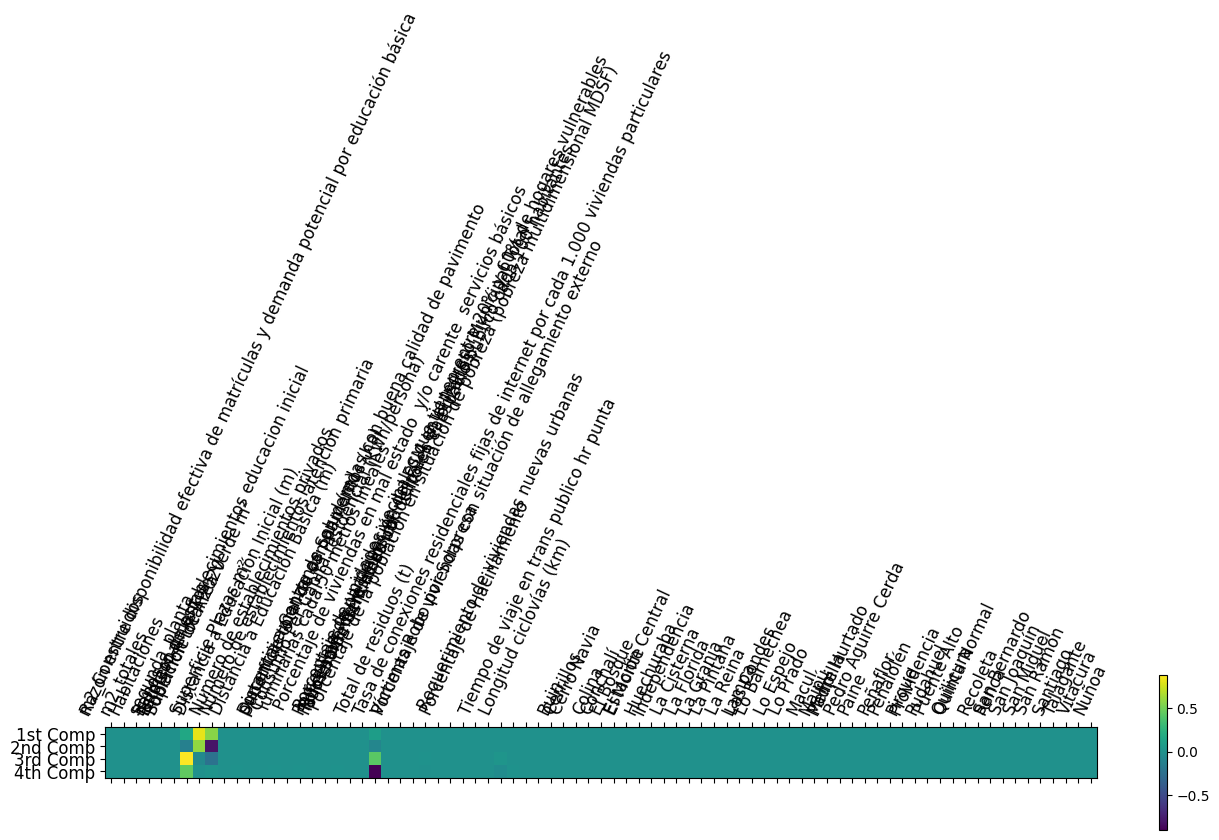

In [69]:
#plt.figure(figsize=(20,20))
plt.matshow(model_pca.components_[0:4], cmap='viridis')
plt.yticks([0,1,2,3,],['1st Comp','2nd Comp','3rd Comp','4th Comp',], fontsize=12)
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, fontsize=12, rotation = 65)
plt.show();

In [76]:
pd.DataFrame(data=model_pca.components_[0:4], columns=X.columns, index=['PC1','PC2','PC3','PC4'])

,m2_Construidos,m2_totales,Habitaciones,Banos,segunda_planta,Estacionamientos,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,Número de establecimientos educacion inicial,...,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Talagante,Vitacura,Ñuñoa
PC1,-0.000054,-0.000135,-1.086835e-07,-4.555130e-08,1.422072e-08,-6.654330e-08,0.156785,0.808860,0.559157,0.000055,...,1.167371e-08,-7.391574e-09,-2.610793e-09,-1.172428e-08,-2.397117e-08,-1.226698e-09,9.594336e-09,-9.517763e-09,-4.383643e-09,-2.949052e-08
PC2,0.000020,0.000134,9.216186e-07,9.073506e-07,-3.618838e-08,2.229206e-07,-0.127399,0.584875,-0.796894,-0.000096,...,1.396837e-07,-6.739803e-09,-8.595911e-08,-9.690309e-09,-2.268137e-08,-1.650611e-09,2.820656e-07,-1.358575e-08,1.525738e-07,-3.642383e-08
PC3,-0.000459,-0.002164,-2.062790e-07,-3.654056e-06,1.535787e-07,-2.184373e-06,0.875022,-0.060530,-0.227472,0.000218,...,-1.514636e-07,2.368759e-08,2.177328e-07,6.072779e-09,1.536622e-07,-2.323724e-09,1.864648e-06,-6.471879e-08,-3.877298e-07,4.473500e-07
PC4,0.000153,0.001612,6.404885e-06,1.314531e-05,-3.389823e-07,7.262814e-06,0.439770,0.001501,0.022579,-0.000665,...,-1.414965e-07,-1.347515e-07,-3.272745e-07,-4.813704e-07,-2.401558e-07,-2.501495e-08,-2.027976e-06,-1.194334e-07,-2.589460e-07,1.575900e-06


___
___
___

# Vamos aplicar un Pipeline y GridSearchCV al segundo mejor modelo XGB

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [72]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
    
])


xgboost_params = {
    'regressor': [XGBRegressor()],
    'regressor__max_depth': [3,4,5,6],
    'regressor__n_estimators': [40,60, 100, 120]

}


search_space = [
  
    xgboost_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamm...
                                                     learning_rate=None,
                                                     max_bin=None,
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=5,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=60,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...)],
                          'regressor__max_depth': [3, 4, 5, 6],
                          'regressor__n_estimators': [40, 60, 100, 120]}])

In [73]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=5, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=60,
                              n_jobs=0, num_parallel_tree=1, 

In [74]:
import joblib

In [75]:
#joblib.dump(clf_b, 'modelo_entrenado.pkl') # Guardo el modelo.

['modelo_entrenado.pkl']

In [76]:
#clf_b = joblib.load('modelo_entrenado.pkl')# cargar el modelo 

In [77]:
clf_b.score(X_train, y_train)

0.9503649670378839

In [78]:
#Score train : 0.9567069101263656
#Score test: 0.8791607391254542

 ## GridSearchCV sin pipeline XGB

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


XGB =XGBRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [100, 200, 300,500],
                  'max_depth'    : [3,4,5,6,8]# profundidad
                 }

In [81]:
grid_XGB = GridSearchCV(estimator= XGB,  # estuviemos copando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [100, 200, 300, 500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [82]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.02, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.8871303308258836

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}


## Pipeline solo

In [78]:
pipeline = Pipeline([('scaler',StandardScaler()),("pca",PCA(n_components=7)), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.9239956011162084
GBR_test: 0.7902989022850804


In [84]:
#Score train : 0.9567069101263656
#Score test: 0.8791607391254542

___
___


# Vamos aplicar un Pipeline y GridSearchCV Bosting_regressor

In [79]:
#https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [82]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
])


bosting_ressor_params = {
    'regressor': [GradientBoostingRegressor()],
    'regressor__max_depth': [3,4,5,6],
    'regressor__n_estimators': [100,110,120,130,160]
}


search_space = [
  
    bosting_ressor_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 3)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [GradientBoostingRegressor(max_depth=4,
                                                                  n_estimators=130)],
                          'regressor__max_depth': [3, 4, 5, 6],
                          'regressor__n_estimators': [100, 110, 120, 130,
                                                      160]}])

In [83]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)

##como  saber el  resultado del score test despues de aplicar pipeline y el gridsearchCV



Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=4, n_estimators=130))])
0.8831176467426044
{'regressor': GradientBoostingRegressor(max_depth=4, n_estimators=130), 'regressor__max_depth': 4, 'regressor__n_estimators': 130}


In [89]:
# Score train : 0.9100212738036423
# Score test: 0.875770251186037

___
___


 # GridSearchCV sin pipeline

In [90]:
#https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], #tasa_de_aprendizaje
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],#submuestra
                  'n_estimators' : [100, 200, 300,500],
                  'max_depth'    : [3,4,5,6,8,]# profundidad
                 }

In [93]:
grid_GBR = GridSearchCV(estimator=GBR,  # estuvimos copiando mas modelos aqui deberiamos incluirlos
                        param_grid = parameters,  # aqui van los parametros de los modelos utilizados
                        cv = 3,    #  cross validation 
                        n_jobs=-1) # Esto significa la cantidad de trabajos que se ejecutarán en paralelo, -1 significa usar todo el procesador.

grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [100, 200, 300, 500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [94]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
  

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.887617417263689

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.2}


In [95]:
# Score train : 0.9100212738036423
# Score test: 0.875770251186037

___
___


# Pipeline Solo 

In [81]:
pipeline = Pipeline([('scaler',StandardScaler()), ("pca",PCA(n_components=4)),('regressor', GradientBoostingRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.7673804422200183
GBR_test: 0.7528022741562868


In [97]:
# Score train : 0.9100212738036423
# Score test: 0.875770251186037

___
___


# Vamos aplicar un Pipeline y GridSearchCV a ambos modelos 

In [98]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),# este metodo sirve para escalar los datos 
    ('regressor', LinearRegression()) 
])

xgboost_params = {
    'regressor': [XGBRegressor()],
    'regressor__max_depth': [3],
    'regressor__n_estimators': [100]
}


bosting_regressor_params = {
    'regressor': [GradientBoostingRegressor()],
    'regressor__max_depth': [3],
    'regressor__n_estimators': [100]
}




search_space = [
    xgboost_params,
    bosting_regressor_params,
]

clf_b = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 10)

clf_b.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid=[{'regressor': [XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamm...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...)],
                          'regressor__max_depth': [3],
                          'regressor__n_estimators': [100]},
                         {'regressor': [GradientBoostingRegressor()],
                          'regressor__max_depth': [3],
                          'regressor__n_estimators': [100]}])

In [99]:
from sklearn import metrics
print(clf_b.best_estimator_)
print(clf_b.best_score_) # 0,76
print(clf_b.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor())])
0.882518167138197
{'regressor': GradientBoostingRegressor(), 'regressor__max_depth': 3, 'regressor__n_estimators': 100}


In [100]:



#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
#https://www.kaggle.com/code/edoardo10/house-price-top-14-stacking-regressor

___
___
___

In [101]:
pipeline = Pipeline([('scaler',StandardScaler()),("pca",PCA(n_components=50)),('regressor', GradientBoostingRegressor())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.8477463608211715
GBR_test: 0.8102790193772484


In [105]:
pipeline = Pipeline([('scaler',StandardScaler()),("pca",PCA(n_components=50)),('regressor',XGBRegressor ())])
pipeline.fit(X_train, y_train)


r2_train=pipeline.score(X_train, y_train)
print(f"GBR_train: {r2_train}")

r2 = pipeline.score(X_test, y_test)
print(f"GBR_test: {r2}")

GBR_train: 0.9707072458335814
GBR_test: 0.8137845220890246


In [ ]:
############################################################################################################################

## StackingRegressor número 2

In [107]:
lr = LinearRegression()
dt= DecisionTreeRegressor(max_depth=4)
knn = KNeighborsRegressor(n_neighbors=15)
xgb_reg = XGBRegressor(n_estimators=160, random_state=seed,max_depth=3)
ada_reg = AdaBoostRegressor(n_estimators=15, random_state=seed)
rnd_reg = RandomForestRegressor(n_estimators=60, max_depth=3,  max_features=3, random_state=seed) 
gbrt = GradientBoostingRegressor(n_estimators=200, random_state=seed,max_depth=5)

In [108]:
stregr = StackingRegressor(regressors=[dt, gbrt, xgb_reg, ada_reg, rnd_reg, knn], 
                           meta_regressor= lr)

stregr.fit(X_train, y_train)

StackingRegressor(meta_regressor=LinearRegression(),
                  regressors=[DecisionTreeRegressor(max_depth=4),
                              GradientBoostingRegressor(max_depth=5,
                                                        n_estimators=200,
                                                        random_state=12),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eva...
                                           max_delta_step=None, max_depth=3,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=160, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=12, ...),
                              AdaBoostRegressor(n_estimators=15,
                                                random_state=12),
                              RandomForestRegressor(max_depth=3, max_features=3,
                                                    n_estimators=60,
                                                    random_state=12),
                              KNeighborsRegressor(n_neighbors=15)])

In [109]:
stregr.score(X_test,y_test)

c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\diazb\miniconda3\envs\data_analysis\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


0.8850412180428631